```{contents}
```

## Workflow

(Agglomerative HC)

### **Step 1: Data Preprocessing**

* **Scale/normalize features** so that all dimensions contribute equally (especially important if using Euclidean distance).
* **Handle missing values** and outliers if possible, as HC is sensitive to noise.

---

### **Step 2: Compute Distance Matrix**

* Calculate **pairwise distances** between all points.
* Common metrics:

  * Euclidean distance (most common)
  * Manhattan distance
  * Cosine distance
* Result is an **n × n distance matrix** (symmetric).

---

### **Step 3: Choose Linkage Criteria**

* Decide **how to measure distance between clusters**:

  1. **Single linkage** → minimum distance between points of clusters
  2. **Complete linkage** → maximum distance between points of clusters
  3. **Average linkage** → average distance between points of clusters
  4. **Ward’s method** → merge clusters to minimize within-cluster variance

> Choice of linkage affects the **shape and size of clusters**.

---

### **Step 4: Iterative Merging (Agglomerative)**

1. Start with each point as its **own cluster**.
2. Find the **two closest clusters** based on chosen linkage and merge them.
3. Update the distance matrix to reflect the merged cluster.
4. Repeat until **all points are merged into a single cluster**.

---

### **Step 5: Build Dendrogram**

* Record merges at each step to create a **tree-like structure**.
* **Height of branches** represents the distance at which clusters were merged.
* Provides a **visual summary** of cluster hierarchy.

---

### **Step 6: Determine Number of Clusters**

* Cut the dendrogram at a chosen height:

  * Clusters below the cut are considered separate clusters.
* Can also use **distance threshold** or **number of clusters** criteria.

---

### **Step 7: Analyze and Interpret**

* Visualize clusters in 2D/3D (after dimensionality reduction if necessary).
* Examine dendrogram to understand **nested structure of clusters**.
* Use clusters for exploratory analysis, pattern discovery, or further modeling.

---

### **Workflow Diagram (Conceptual)**

1. **Data Preprocessing** → standardization, outlier handling
2. **Compute Distance Matrix** → pairwise distances
3. **Choose Linkage Method** → single, complete, average, Ward
4. **Iterative Merging** → merge closest clusters
5. **Build Dendrogram** → tree showing merges
6. **Cut Dendrogram** → form clusters
7. **Analysis & Interpretation** → examine cluster structure

---

### **Intuition**

* Think of each point as a **leaf of a tree**:

  * Merge closest leaves first → form branches → eventually form the root.
* Cutting the tree at different heights gives **different levels of clustering granularity**.

---



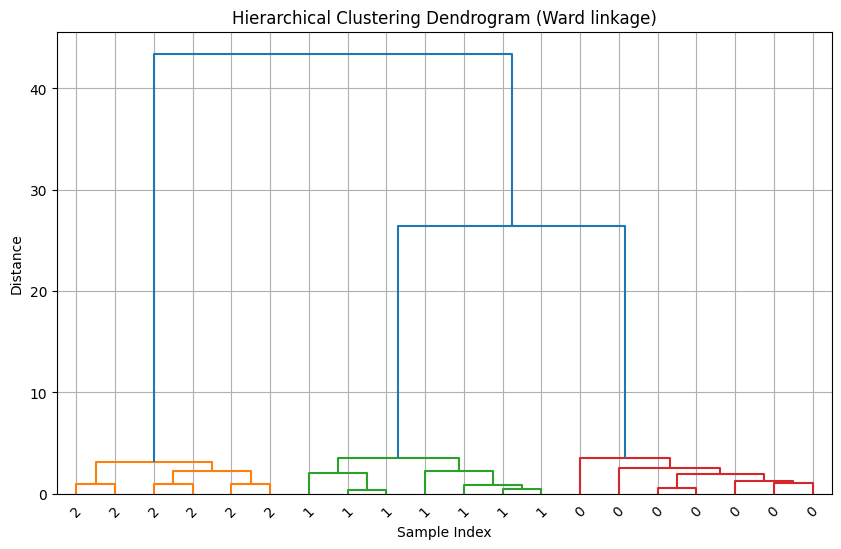

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic dataset
X, y = make_blobs(n_samples=20, centers=3, n_features=2, random_state=42)

# Step 2: Compute linkage matrix using Ward's method
Z = linkage(X, method='ward')

# Step 3: Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=y, leaf_rotation=45, leaf_font_size=10, color_threshold=10)
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


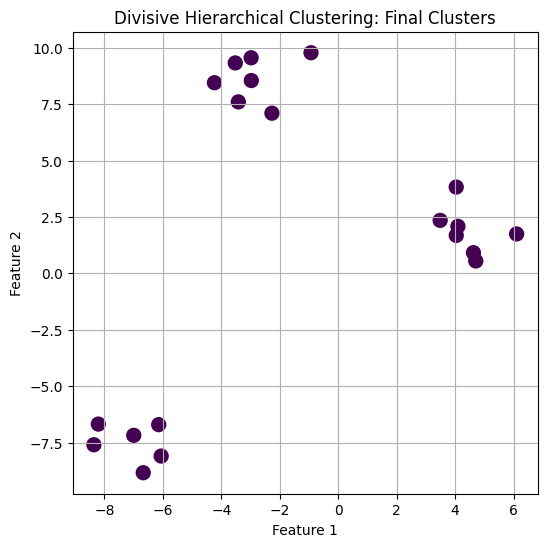

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

# Generate synthetic dataset
X, y = make_blobs(n_samples=20, centers=3, n_features=2, random_state=42)

# Recursive divisive clustering function
def divisive_clustering(X, labels=None, cluster_id=0, dendro=None, parent=-1):
    if labels is None:
        labels = np.zeros(len(X))
    if dendro is None:
        dendro = []

    # Stopping criterion: cluster size = 1
    if len(X) <= 1:
        return labels, dendro

    # Split using KMeans with k=2
    kmeans = KMeans(n_clusters=2, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Record split in dendrogram: parent, child, distance (use max distance in cluster)
    dist = np.max(np.linalg.norm(X - kmeans.cluster_centers_[cluster_labels], axis=1))
    dendro.append([parent, cluster_id, dist, len(X)])

    # Recursively split each sub-cluster
    for sub_label in [0, 1]:
        sub_indices = np.where(cluster_labels == sub_label)[0]
        if len(sub_indices) > 0:
            labels[sub_indices], dendro = divisive_clustering(X[sub_indices], labels[sub_indices],
                                                              cluster_id+1, dendro, cluster_id)
    return labels, dendro

# Run divisive clustering
labels, dendro = divisive_clustering(X)

# Convert dendro to array for plotting
dendro = np.array(dendro)

# Plot synthetic dataset with final labels
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=100)
plt.title("Divisive Hierarchical Clustering: Final Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()
